In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Step 2: Calculate TEMA
def calculate_tema(data, period=20):
    # Calculate EMA1, EMA2, and EMA3
    ema1 = data['Close'].ewm(span=period, adjust=False).mean()
    ema2 = ema1.ewm(span=period, adjust=False).mean()
    ema3 = ema2.ewm(span=period, adjust=False).mean()
    
    # Calculate TEMA
    tema = 3 * ema1 - 3 * ema2 + ema3
    data['TEMA'] = tema
    return data

In [7]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply TEMA calculation
    period = 20  # You can adjust the period
    data = calculate_tema(data, period)
    
    # Step 3: Plot Close Price and TEMA
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.6)
    plt.plot(data['TEMA'], label=f'TEMA ({period})', color='red', linewidth=2)
    plt.title(f'TEMA (Triple Exponential Moving Average) for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


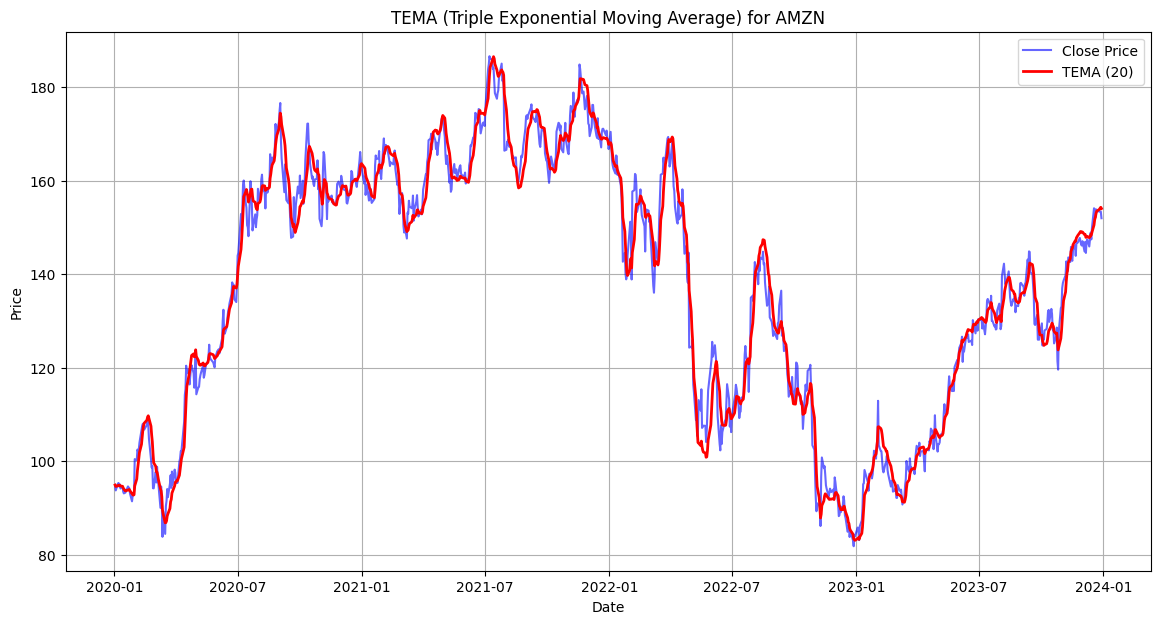

In [9]:
show_graph("AMZN")